# Геометрия на плоскости
Уравнение
$$
f(x,y)=0
$$
задает линию на плоскости $xy$. 

In [3]:
var("x,y")

(x, y)

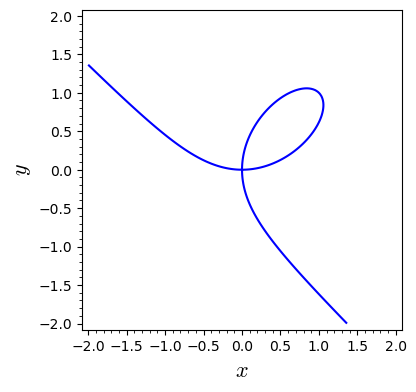

In [4]:
implicit_plot(x^3+y^3-2*x*y, (x,-2,2),(y,-2,2), axes_labels=['$x$','$y$'])

## Задача о пересечении кривых

Задача. Найдите все вещественные точки пересечения листа Декарта 
$$
x^3+y^3=2xy
$$
и окружности
$$
x^2+y^2=1.
$$
По умолчанию задача решается над полем $\mathbb{R}$.

## Графическое решение

## 1.) Дайте графическое решение задачи. Сколько получилось точек пересечения?

### Ответ:

В данном случае получилось 4 точки пересечения.

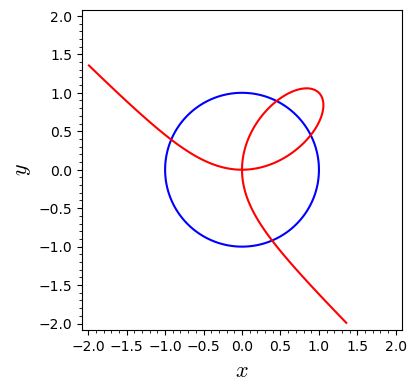

In [5]:
K=QQ[x,y]
f=x^2+y^2-1
g=x^3+y^3-2*x*y
implicit_plot(f, (x,-2,2),(y,-2,2), axes_labels=['$x$','$y$']) + \
implicit_plot(g, (x,-2,2),(y,-2,2), color='red')

Зам. Могут быть потеряны корни.

### Решение при помощи базисов Грёбнера

Абсциссы точек пеересечения удовлетворяют уравнению 
$$
h(x)=0, \quad h \in (f,g)
$$
Поэтому все дело сводится к отысканию следствия уравнений $f$ и $g$, содержащему только $x$. При lex-порядке и $x<y$ такой многочлен обязательно входит в базис Грёбнера.

## 2.) Найдите базис Грёбера идеала 
$$
J=(x^3+y^3-2xy, x^2+y^2-1).
$$

In [6]:
K=PolynomialRing(QQ,[y,x],order='lex')
J=K*[f,g]
J.groebner_basis()

[y + 10*x^5 + 24*x^4 + 15*x^3 - 34*x^2 - 19*x + 12, x^6 + 2*x^5 + 1/2*x^4 - 4*x^3 - 1/2*x^2 + 2*x - 1/2]

## 3.) Эквивалентны ли системы уравнений

$$
x^3+y^3=2xy, \quad x^2+y^2=1
$$
и
$$
y + 10 x^{5} + 24 x^{4} + 15 x^{3} - 34 x^{2} - 19 x + 12=0, \quad 
x^{6} + 2 x^{5} + \frac{1}{2} x^{4} - 4 x^{3} - \frac{1}{2} x^{2} + 2 x - \frac{1}{2}?
$$

### Ответ:

Системы эквивалентны в QQ[x, y], но в CC[x,y] появляются комплексные корни, поэтому в CC они не эквивалентны.

## 4.) Найдите вещественные корни того из базисных элементов, который зависит только от $x$.

### Ответ:

In [7]:
[s,h]=J.groebner_basis() # Наш базис мы разложили на список элементов - s и h
# где s - первый элемент, а h - второй.

После этого мы просто находим решения второго элемента - т.к базисе Грёбнера последний элемент зависит от одной переменной, от какой - зависит от мономиального порядка. В данном случае - от x.

In [8]:
X=QQ[x](h).roots(AA,False)
X

[-0.9203685839444056?,
 0.3910520038155663?,
 0.4497874598272411?,
 0.893135622949930?]

## 5.) Почему уравнение 6-ой степени имеет только 4-ре корня?

### Ответ:

Потому что ещё два корня - комплексные, а мы работаем в кольце рациональных чисел.
В итоге:

4 - рациональные;
2 - комплексные.

## 6.) Подставьте найденные значения $x$ в первое уравнение и найдите соответсвующие им  значения $y$.

In [9]:
XY=[[xx, AA[y](s.subs(x=xx)).roots(AA,False)[0]] for xx in X]
XY

[[-0.9203685839444056?, 0.3910520038155663?],
 [0.3910520038155663?, -0.9203685839444056?],
 [0.4497874598272411?, 0.893135622949930?],
 [0.893135622949930?, 0.4497874598272411?]]

In [46]:
XY=[[xx, AA[y](s.subs(x=xx)).roots(AA,False)] for xx in X]
XY

[[-0.9203685839444056?, [0.3910520038155663?]],
 [0.3910520038155663?, [-0.9203685839444056?]],
 [0.4497874598272411?, [0.893135622949930?]],
 [0.893135622949930?, [0.4497874598272411?]]]

## 7.) Почему здесь испоьлзуется [0]?

### Ответ:

Потому что наш список состоит из одного элемента, поэтому нет разницы между выводов одного элемента и целого списка.

## 8.) Сравните графическое решение и найденное при помощи базисов Грёбнера.

### Ответ:

Если внимательно посмотреть на точки, то можно понять, что значения, которые мы получили при помощи базисов Грёбнера, равны, во всяком случае, насколько здесь это видно. Чтобы увидеть эти точки ближе, необходимо отдельно строить какие-либо части графика с детальным приближением. Пока мы лишь можем сказать, что не видно существенных отличий.

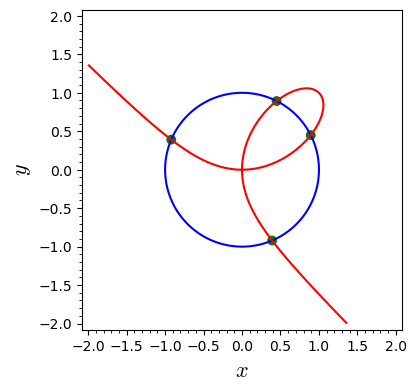

In [10]:
K=QQ[x,y]
f=x^2+y^2-1
g=x^3+y^3-2*x*y
implicit_plot(f, (x,-2,2),(y,-2,2), axes_labels=['$x$','$y$']) + \
implicit_plot(g, (x,-2,2),(y,-2,2), color='red') + point(XY, size=50, color='green')

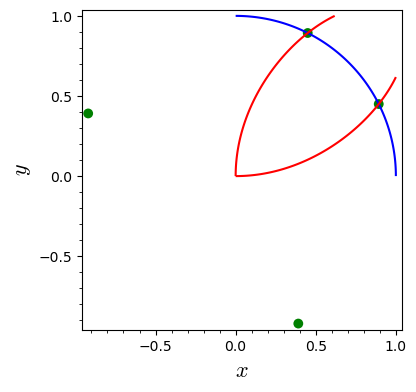

In [11]:
implicit_plot(f, (x,0,1),(y,0,1), axes_labels=['$x$','$y$']) + \
implicit_plot(g, (x,0,1),(y,0,1), color='red') + point(XY, size=50, color='green')

## 9.) Решите ту же задачу над полем $\mathbb{C}$. Сколько получается точек пересечения?

### Ответ:

Получается 6 точек пересечения, две из которых - с мнимыми единицами.

In [12]:
f=x^2+y^2-1
g=x^3+y^3-2*x*y
K=PolynomialRing(QQ,[y,x],order='lex')
J=K*[f,g]
[s,h]=J.groebner_basis()
X=QQ[x](h).roots(QQbar,False)
XY=[[xx, QQbar[y](s.subs(x=xx)).roots(QQbar,False)[0]] for xx in X]
XY

[[-0.9203685839444056?, 0.3910520038155662?],
 [0.3910520038155663?, -0.9203685839444056?],
 [0.4497874598272411?, 0.893135622949930?],
 [0.893135622949930?, 0.4497874598272411?],
 [-1.406803251324166? - 1.216180655962034?*I,
  -1.406803251324166? + 1.216180655962034?*I],
 [-1.406803251324166? + 1.216180655962034?*I,
  -1.406803251324166? - 1.216180655962034?*I]]

### Решение при помощи нашей реализации алгоритма Бухбергера 

## 10.) Найдите базис Грёбера идеала 
$$
J=(x^3+y^3-2xy, x^2+y^2-1),
$$
## не используя функцию groebner_baasis. Сколько получилось базисных элементов? Есть ли среди них совпадающие?

### Ответ:

Всего элементов 17.

При этом у нас одно совпадение, а значит, что есть два одинаковых элемента.

Если считать совпадающие элементы как один, то будет 16 базисных элементов.

In [13]:
def rem_step(f,J,K):
    ans=0
    while ans==0:
        ans=1
        if K(f) != 0:
            for g in J:
                a = K(f).lt()/K(g).lt()
                if a in K:
                    ans=0
                    f=K(f)-a*K(g)
                    break
    return SR(f)

def rem(f,J,K):
    p=rem_step(f,J,K)
    r=0
    while K(p)!=0:
        [f,r]=[K(p)-K(p).lt(),K(r)+K(p).lt()]
        p=rem_step(f,J,K)
    return SR(r)

def spolynomials(J,K):
    S=[]
    for (f,g) in Combinations(J,2):
        m=lcm(K(f).lm(),K(g).lm())
        h=K(m/K(f).lt()*f-m/K(g).lt()*g)
        h=rem(h,J,K)
        if K(h)!=0:
            S.append(SR(h))
    return S

def groebner_basis(J,K):
    S=spolynomials(J,K)
    while S!=[]:
        print('*')
        J=J+S
        S=spolynomials(J,K)
    return J

In [14]:
K=PolynomialRing(QQ,[y,x],order='lex')
B=groebner_basis([f,g],K)
B

*
*
*
*


[x^2 + y^2 - 1,
 x^3 + y^3 - 2*x*y,
 -x^3 + x^2*y + 2*x*y - y,
 2*x^4 - 2*x^2 + 5*x*y - 2*x - 2*y + 1,
 -2/5*x^5 - 24/25*x^4 - 3/5*x^3 + 34/25*x^2 + 19/25*x - 1/25*y - 12/25,
 2/5*x^6 - 43/25*x^4 - 14/5*x^3 + 63/25*x^2 + 58/25*x - 2/25*y - 29/25,
 -2/5*x^5 - 24/25*x^4 - 3/5*x^3 + 34/25*x^2 + 19/25*x - 1/25*y - 12/25,
 -10*x^6 - 20*x^5 - 5*x^4 + 40*x^3 + 5*x^2 - 20*x + 5,
 5*x^7 - 10*x^6 - 75/2*x^5 - 30*x^4 + 155/2*x^3 + 20*x^2 - 85/2*x + 10,
 2/5*x^6 + 4/5*x^5 + 1/5*x^4 - 8/5*x^3 - 1/5*x^2 + 4/5*x - 1/5,
 10*x^7 + 24*x^6 + 13*x^5 - 38*x^4 - 21*x^3 + 18*x^2 + 3*x - 2,
 -5*x^8 + 53/2*x^6 + 43*x^5 - 33*x^4 - 51*x^3 + 18*x^2 + 13*x - 9/2,
 -10*x^7 - 24*x^6 - 13*x^5 + 38*x^4 + 21*x^3 - 18*x^2 - 3*x + 2,
 5*x^8 - 43/2*x^6 - 33*x^5 + 71/2*x^4 + 31*x^3 - 41/2*x^2 - 3*x + 2,
 -10*x^6 - 20*x^5 - 5*x^4 + 40*x^3 + 5*x^2 - 20*x + 5,
 5*x^7 - 35/2*x^5 - 25*x^4 + 75/2*x^3 + 15*x^2 - 45/2*x + 5,
 5*x^6 + 10*x^5 + 5/2*x^4 - 20*x^3 - 5/2*x^2 + 10*x - 5/2]

In [15]:
len(B)

17

In [16]:
m = 0
k = 0
for i in B:
    while m!= 16:
        a = B[m]
        if i == a:
            k+=1
        m+=1
print(k)

1


## 11.) Найдите корни базисного элемента, зависящего от $x$, и имеющего наименьшую степень.

In [17]:
h=B[-1]
X=QQ[x](h).roots(AA,False)
X

[-0.9203685839444056?,
 0.3910520038155663?,
 0.4497874598272411?,
 0.893135622949930?]

## 12.) Как связаны базисные многочлены, зависящие только от $x$?

### Ответ:

$$
-10*x^6 - 20*x^5 - 5*x^4 + 40*x^3 + 5*x^2 - 20*x + 5,
$$

$$
 5*x^7 - 10*x^6 - 75/2*x^5 - 30*x^4 + 155/2*x^3 + 20*x^2 - 85/2*x + 10,
$$

$$
 2/5*x^6 + 4/5*x^5 + 1/5*x^4 - 8/5*x^3 - 1/5*x^2 + 4/5*x - 1/5,
$$

$$
 10*x^7 + 24*x^6 + 13*x^5 - 38*x^4 - 21*x^3 + 18*x^2 + 3*x - 2,
$$

$$
 -5*x^8 + 53/2*x^6 + 43*x^5 - 33*x^4 - 51*x^3 + 18*x^2 + 13*x - 9/2,
$$

$$
 -10*x^7 - 24*x^6 - 13*x^5 + 38*x^4 + 21*x^3 - 18*x^2 - 3*x + 2,
$$

$$
 5*x^8 - 43/2*x^6 - 33*x^5 + 71/2*x^4 + 31*x^3 - 41/2*x^2 - 3*x + 2,
$$

$$
 -10*x^6 - 20*x^5 - 5*x^4 + 40*x^3 + 5*x^2 - 20*x + 5,
$$

$$
 5*x^7 - 35/2*x^5 - 25*x^4 + 75/2*x^3 + 15*x^2 - 45/2*x + 5,
$$

$$
 5*x^6 + 10*x^5 + 5/2*x^4 - 20*x^3 - 5/2*x^2 + 10*x - 5/2
$$

Это все многочлены от x, которые есть в нашем базисе. Они могут быть поделены на базисный элемент, который зависит от $x$, и имеет наименьшую степень. При этом некоторые многочлены делятся так, что в остатке остается лишь число, то есть, они отличаются от нашего минимального многочлена лишь коэффициентами.

QQ[x](g).quo_rem(QQ[x](h)) - деление всех g из B по очереди на h - а в предыдущем задании мы h обозначили как минимальных зависящий от x элемент. При этом элементы B должны принадлежать QQ[x], то есть, зависеть только от одной переменной икс.

In [18]:
[QQ[x](g).quo_rem(QQ[x](h)) for g in B if g in QQ[x]]

[(-2, 0),
 (x - 4, 0),
 (2/25, 0),
 (2*x + 4/5, 0),
 (-x^2 + 2*x + 9/5, 0),
 (-2*x - 4/5, 0),
 (x^2 - 2*x - 4/5, 0),
 (-2, 0),
 (x - 2, 0),
 (1, 0)]

## 13.) Найдите подходящие значения $y$.

Для отыскания $y$ получается несколько уравнений, среди которых есть одно линейное.

In [20]:
[[AA[y](s.subs(x=xx)) for s in B] for xx in X]

[[y^2 - 0.1529216696881696?,
  y^3 + 1.840737167888812?*y - 0.7796242833590908?,
  -1.993658837576981?*y + 0.7796242833590908?,
  -6.601842919722028?*y + 2.581663902632907?,
  -1/25*y + 0.01564208015262265?,
  -2/25*y + 0.03128416030524530?,
  -1/25*y + 0.01564208015262265?,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [y^2 - 0.8470783303118304?,
  y^3 - 0.7821040076311325?*y + 0.0598003253583809?,
  -0.0649743226806980?*y - 0.0598003253583809?,
  -0.0447399809221690?*y - 0.04117727288703635?,
  -1/25*y - 0.03681474335777623?,
  -2/25*y - 0.07362948671555245?,
  -1/25*y - 0.03681474335777623?,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [y^2 - 0.7976912409821580?,
  y^3 - 0.8995749196544822?*y + 0.09099594281943659?,
  0.10188367867232410?*y - 0.09099594281943659?,
  0.2489372991362053?*y - 0.2223347697394876?,
  -1/25*y + 0.03572542491799717?,
  -2/25*y + 0.0714508498359944?,
  -1/25*y + 0.03572542491799717?,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [y^2 - 0.

In [21]:
XY=[[xx, AA[y](B[2].subs(x=xx)).roots(AA,False)[0]] for xx in X]
XY

[[-0.9203685839444056?, 0.3910520038155662?],
 [0.3910520038155663?, -0.920368583944406?],
 [0.4497874598272411?, 0.893135622949930?],
 [0.893135622949930?, 0.4497874598272411?]]

## 13.) Сравните полученное решение с найденным графически

### Ответ:

Если внимательно посмотреть на точки, то можно понять, что значения равны тем, которые мы получили при помощи базисов Грёбнера, во всяком случае, насколько это видно. Чтобы увидеть эти точки ближе, нужно отдельно строить какие-либо части графика с детальным приближением. Пока мы лишь можем сказать, что не видно существенных отличий.

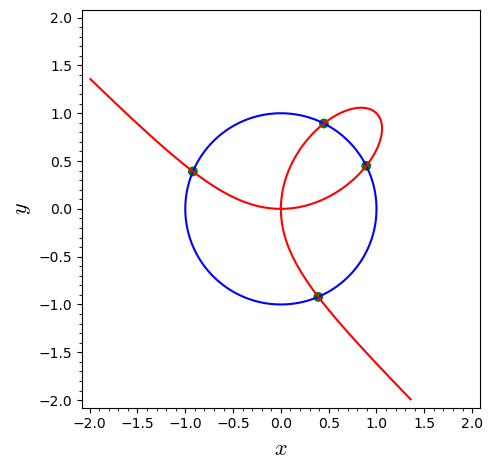

In [40]:
implicit_plot(f, (x,-2,2),(y,-2,2), axes_labels=['$x$','$y$']) + \
implicit_plot(g, (x,-2,2),(y,-2,2), color='red') + point(XY, size=50, color='green')

## 14.) Проверьте, что во всех 4-х точках уравнения B удолветворяются тождественно.

### Ответ:

Да, они удовлетворяются тождественно, так как везде получается x, а он тождественен сам себе.

In [41]:
[[AA(s.subs(x=xx).subs(y=yy)).minpoly() for s in B] for [xx,yy] in XY]

[[x, x, x, x, x, x, x, x, x, x, x, x, x, x, x, x, x],
 [x, x, x, x, x, x, x, x, x, x, x, x, x, x, x, x, x],
 [x, x, x, x, x, x, x, x, x, x, x, x, x, x, x, x, x],
 [x, x, x, x, x, x, x, x, x, x, x, x, x, x, x, x, x]]

Здесь x - это минимальный многочлен, то есть само число - корень уравнения $x=0$ (точный нуль).

## 15.) Всегда ли уравнение относительно $y$ имеет первую степень?

### Ответ:

Нет, не всегда.

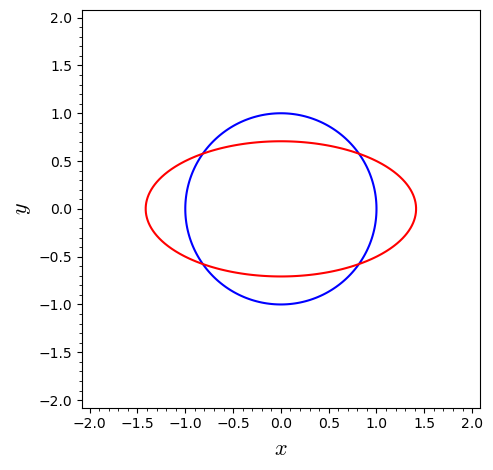

In [42]:
f=x^2+y^2-1
g=x^2+4*y^2-2
implicit_plot(f, (x,-2,2),(y,-2,2), axes_labels=['$x$','$y$']) + \
implicit_plot(g, (x,-2,2),(y,-2,2), color='red')

In [43]:
K=PolynomialRing(QQ,[y,x],order='lex')
J=K*[f,g]
J.groebner_basis()

[y^2 - 1/3, x^2 - 2/3]

## 16.) Могут ли получиться кратные корни?

### Ответ:

Да, могут, ниже на графике видно, что получается два корня, но при этом они кратности два, именно это я и проверила в коде внизу страницы.

(-1, 0) - кратности 2

(1, 0) - кратности 2

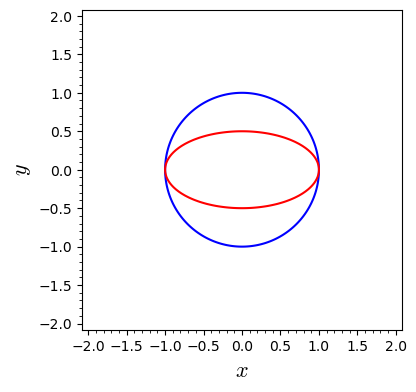

In [25]:
f=x^2+y^2-1
g=x^2+4*y^2-1
implicit_plot(f, (x,-2,2),(y,-2,2), axes_labels=['$x$','$y$']) + \
implicit_plot(g, (x,-2,2),(y,-2,2), color='red')

In [26]:
K=PolynomialRing(QQ,[y,x],order='lex')
J=K*[f,g]
J.groebner_basis()

[y^2, x^2 - 1]

In [30]:
[s,h]=J.groebner_basis()
X=QQ[x](h).roots(QQbar,False)
XY=[[xx, QQbar[y](s.subs(x=xx)).roots(QQbar,True)[0]] for xx in X]
XY

[[-1, (0, 2)], [1, (0, 2)]]